# Computing probabilities of placings in a competition

<p>Consider a competition with 3 participants, and assume we know the probabilities of winning for each partitipant, e.g. 50%, 30% and 20% for the participants 1, 2, and 3 respectively. This means that we expect that 50% of the time participant 1 would win the competition, 30% of the time participant 2 would win the competition, and the rest 20% of the time the winner would be participant 3. What about places of other participants when the first one wins? I.e., can we calculate the probabilities of placements (1,2,3) and (1,3,2)?</p>

<p>Just knowing probabilities of winning in not sufficient to solve the problem. However if we assume that probabilities of winning reflect <i>relative strength</i> of participants, the situation changes. By relative strength we mean the proportion 5:3:2 in which the participants win the competitions, and assume that the proportions kept untouched in a competition with a subset of participants. E.g., in a competition between participants 2 and 3 the probabilities of winning would form a proportion 30%:20% = 3:2, so in 60% of competitions which were won by number 1, the placing would be (1,2,3), and in the rest 40% of those competitions the placing would be (1,3,2).</p>

<p>With this assumption we would compute probabilities of all placings using recursive tree procedure</p>

## Formal problem statement

Let there be $n$ participants in a competition, denote the set of participants $N=\{1,2,\dots,n\}$, and let $p_k,\,k\in N$ be the probabilities of winning a competition by a participant $k$. We would assume that the probabilities reflect relative strength of participants, that is, in each competition with a nonempty subset of participants $S\subseteq N$ probabilities of winning the competition would keep relative value

$$
p_k^S=\frac{p_k}{\sum_{i\in S}p_i},\;\;k\in S.
$$

In the introductory example we have $n=3$, $N=\{1,2,3\}$, $p_1=0.5$, $p_2=0.3$, $p_3=0.2$, so for $S=\{2,3\}$ we have $p_1^S=0.6$, $p_2^S=0.4$, and for $S=\{1,2\}$ the probabilities are $p_1^S=5/8=0.625$, $p_2^S=3/8=0.375$.

Next denote $R(S)=(i_1,\dots,i_{|S|})$ a permutation of elements of a set $S$; here $|S|$ stands for number of elements of $S$. Any such permutation represents a placement of participants in a competition among members of $S$. With assumptions described, probability of such placement is computed via

$$
P(R(S))=p_{i_1}^S P(R(S\setminus\{i_1\})),
$$
which may be contunued recursively as

$$
P(R(S)) = p_{i_1}^S p_{i_2}^{S\setminus\{i_1\}} p_{i_3}^{S\setminus\{i_1,i_2\}}\cdots p_{i_{|S|-1}}^{\{i_{|S|-1},i_{|S|}\}} p_{i_{|S|}}^{\{i_{|S|}\}},
$$
where clearly $p_{i_{|S|}}^{\{i_{|S|}\}}=1$, because in a competition with one participant that participant wins with probability 1.

## Code for recursive calculation of a placement probability

In [1]:
# import standard package
%pylab inline

# computing placement probability
def plc_prob(placement, probs_win):
    """ takes a placement, e.g. [2,1,3,0], and probabilities of winning,
    returns the probability of the placement
    """
    n = len(probs_win)
    if n <= 1:
        return 1
    else:
        # pw = probs_win[placement]
        pn = np.delete(probs_win, 0)
        pn = pn / pn.sum()
        pr0 = probs_win[0]
        plc = np.delete(placement, 0)
        return pr0 * plc_prob(plc, pn)

# creating a list of all permutations (placements) of the array a
def permutations(a):
    """ returns a list of all permutations of elements
    of the array 'a', each element of the output list
    is a permutatation represented by a numpy array

    """
    ls = list()
    n = len(a)
    if n <= 1:
        ls.append(a)
    else:
        for i in range(n):
            tmp = a[i]
            aa = np.delete(a, i)
            lss = permutations(aa)
            lss = [np.concatenate(([tmp], x)) for x in lss]
            ls.extend(lss)
    return ls

Populating the interactive namespace from numpy and matplotlib


## Examples

### Generic code

In [2]:
def example(probs_win):
    """ takes an array of winning probabilities,
    computes probabilities for all placements,
    and prints them out
    """
    participants = np.array(range(len(probs_win)))
    all_plcs = permutations(participants)

    # compute probabilities of all permutations
    probs = np.array([plc_prob(plc, probs_win[plc]) for plc in all_plcs])
    
    return all_plcs, probs

def print_out(all_plcs, probs):
    """ just print out the results """

    for i in range(len(probs)):
        print(all_plcs[i] + 1, '{0:10.3f}'.format(probs[i]).strip())

def plot_probs(all_plcs, probs, save_figure=False):
    """ plots the results as a horizontsl bar chart """
    s = [','.join(['{0}'.format(i) for i in all_plcs[j] + 1]) \
         for j in range(len(all_plcs))]
    xx = np.array(range(len(probs)))
    bb = barh(xx, probs)
    yy = yticks(xx, s)
    yl = ylabel('Placement')
    xl = xlabel('Probability')
    ti = title('Probabilities of placements')
    if save_figure:
        savefig('a.png')

### Two participants

In [3]:
probs_win = np.array([0.6, 0.4])
all_plcs, probs = example(probs_win)
print_out(all_plcs, probs)

[1 2] 0.600
[2 1] 0.400


### Three participants

In [4]:
probs_win = np.array([0.5,0.3,0.2])
all_plcs, probs = example(probs_win)
print_out(all_plcs, probs)

[1 2 3] 0.300
[1 3 2] 0.200
[2 1 3] 0.214
[2 3 1] 0.086
[3 1 2] 0.125
[3 2 1] 0.075


### Four participants, two different sets of winning probabilities

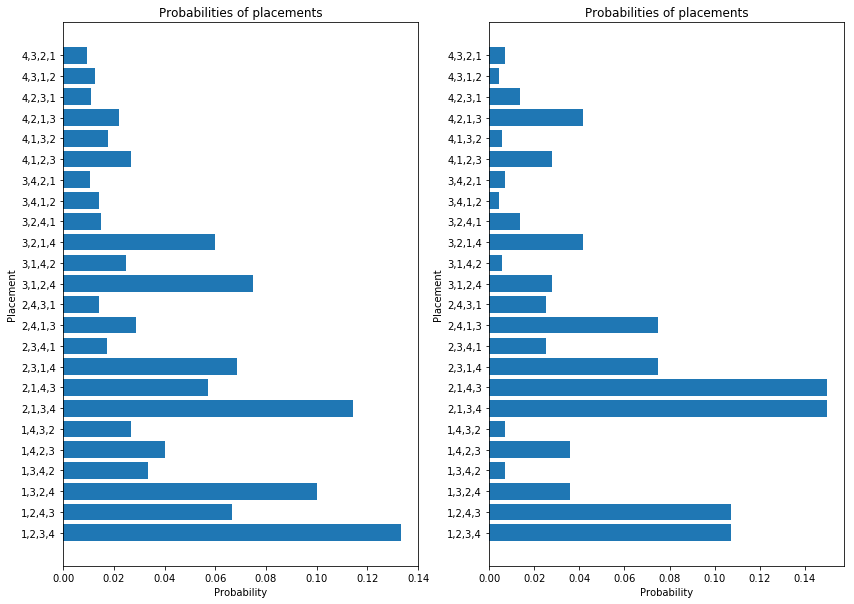

In [5]:
# calculate probabilities of placements for the first set
probs_win1 = np.array([0.4, 0.3, 0.2, 0.1])
all_plcs1, probs1 = example(probs_win1)

# calculate probabilities of placements for the second set
probs_win2 = np.array([0.3, 0.5, 0.1, 0.1])
all_plcs2, probs2 = example(probs_win2)

# draw charts
figsize(14,10)
subplot(1,2,1)
plot_probs(all_plcs1, probs1)
subplot(1,2,2)
plot_probs(all_plcs2, probs2)